Basic Statistics:
                age        salary gender
count     6.000000      6.000000      6
unique         NaN           NaN      4
top            NaN           NaN   Male
freq           NaN           NaN      2
mean     42.333333  58166.666667    NaN
std      41.044691  32251.614947    NaN
min      -1.000000  -1000.000000    NaN
25%      26.250000  52500.000000    NaN
50%      32.500000  65000.000000    NaN
75%      42.500000  77500.000000    NaN
max     120.000000  90000.000000    NaN

Null Values:
 age       1
salary    1
gender    1
dtype: int64

Unique values in 'gender': ['Male' 'Female' 'Other' 'Unknown' nan]


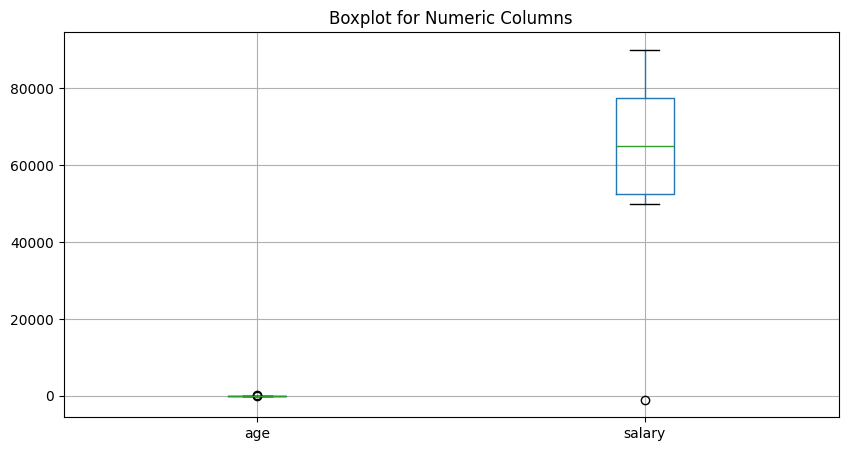


Validation Results:
 {'age': ['Type error in age', 'Values below min in age'], 'salary': ['Values below min in salary'], 'gender': ['Type error in gender', 'Unexpected values in gender']}


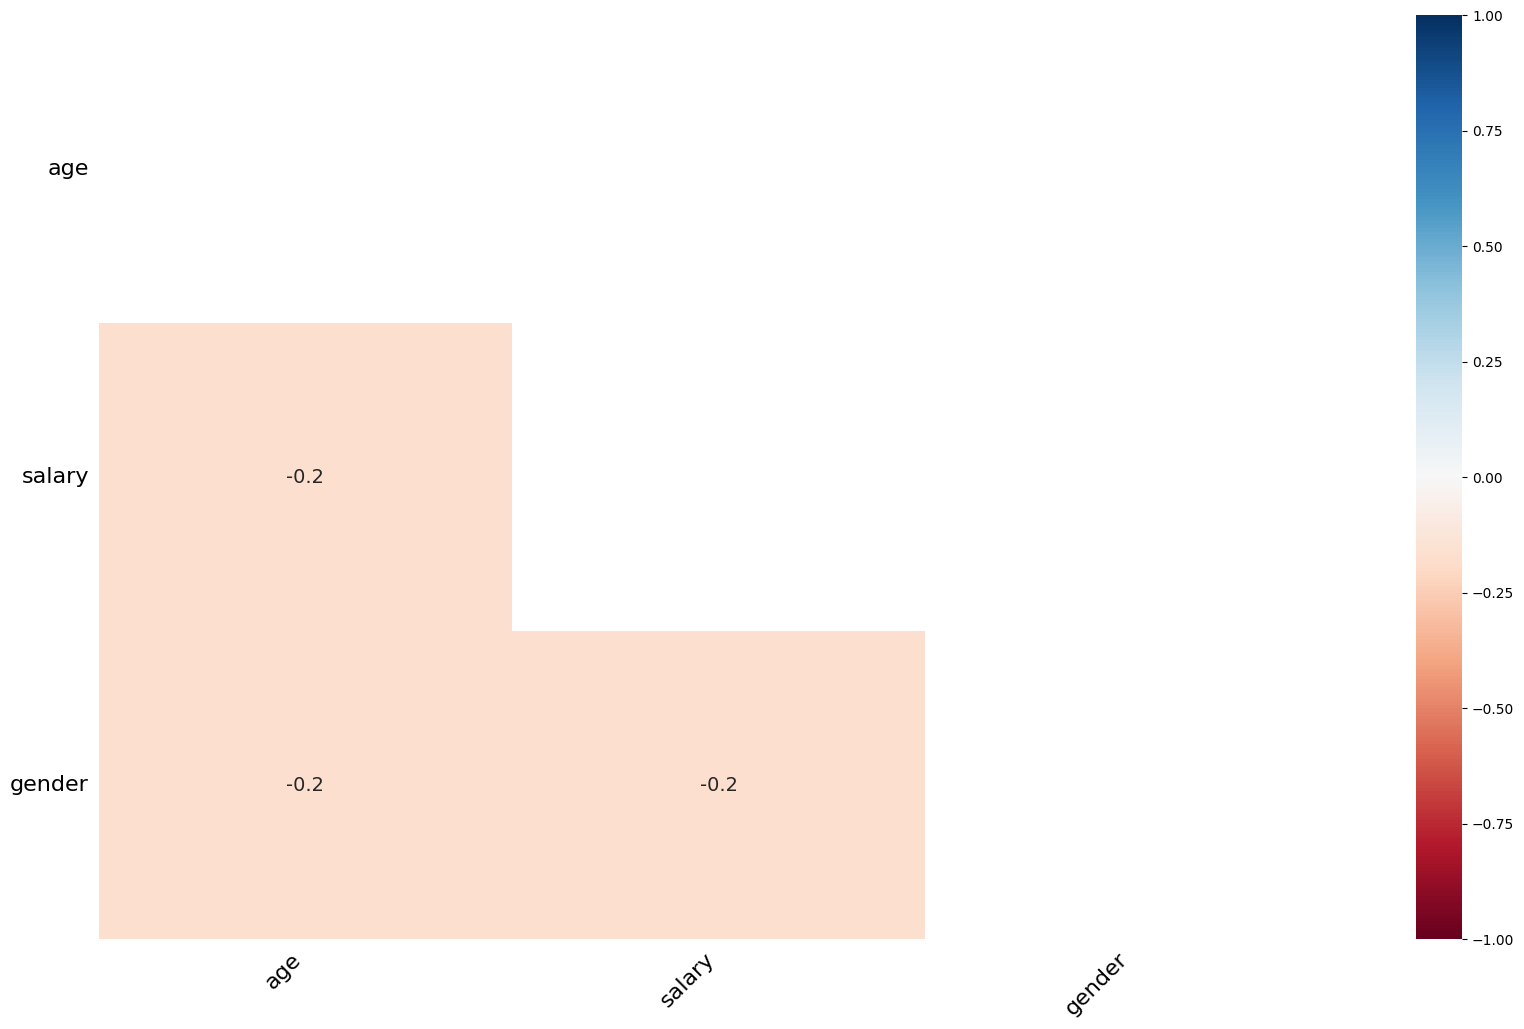


Rows with missing data:
     age   salary  gender
2  45.0      NaN   Other
3   NaN  70000.0  Female
6  35.0  -1000.0     NaN


AttributeError: module 'great_expectations' has no attribute 'from_pandas'

In [2]:
# Task 1: Data Profiling to Understand Data Quality

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create sample data directly in code
data = {
    'age': [25, 30, 45, np.nan, 120, -1, 35],
    'salary': [50000.0, 60000.0, np.nan, 70000.0, 80000.0, 90000.0, -1000.0],
    'gender': ['Male', 'Female', 'Other', 'Female', 'Male', 'Unknown', np.nan]
}
df = pd.DataFrame(data)

if not df.empty:
    # 1. Basic statistics
    print("Basic Statistics:\n", df.describe(include='all'))

    # 2. Null values
    print("\nNull Values:\n", df.isnull().sum())

    # 3. Unique values for categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        print(f"\nUnique values in '{col}':", df[col].unique())

    # 4. Outliers using box plots for numeric columns
    num_cols = df.select_dtypes(include=[np.number]).columns
    if len(num_cols) > 0:
        df[num_cols].boxplot(figsize=(10, 5))
        plt.title("Boxplot for Numeric Columns")
        plt.show()
else:
    print("No data to profile.")

# Task 2: Implement Simple Data Validation

constraints = {
    'age': {'type': int, 'min': 0, 'max': 120},
    'salary': {'type': float, 'min': 0},
    'gender': {'type': str, 'allowed': ['Male', 'Female', 'Other']}
}

def validate_column(col, rules):
    errors = []
    if 'type' in rules:
        if not np.issubdtype(df[col].dropna().dtype, np.dtype(rules['type'])):
            errors.append(f"Type error in {col}")
    if 'min' in rules:
        if (df[col] < rules['min']).any():
            errors.append(f"Values below min in {col}")
    if 'max' in rules:
        if (df[col] > rules['max']).any():
            errors.append(f"Values above max in {col}")
    if 'allowed' in rules:
        if not df[col].isin(rules['allowed']).all():
            errors.append(f"Unexpected values in {col}")
    return errors

validation_results = {}
if not df.empty:
    for col, rules in constraints.items():
        if col in df.columns:
            validation_results[col] = validate_column(col, rules)
    print("\nValidation Results:\n", validation_results)

# Task 3: Detect Missing Data Patterns

import missingno as msno

if not df.empty:
    # 1. Visualize missing data
    msno.heatmap(df)
    plt.show()

    # 2. Identify patterns (simple printout)
    print("\nRows with missing data:\n", df[df.isnull().any(axis=1)])

# Task 4: Integrate Automated Data Quality Checks

import great_expectations as ge

if not df.empty:
    # Convert pandas DataFrame to Great Expectations DataFrame
    ge_df = ge.from_pandas(df)

    # Example: Check if 'age' column values are between 0 and 120
    if 'age' in ge_df.columns:
        result = ge_df.expect_column_values_to_be_between('age', min_value=0, max_value=120)
        print("\nGreat Expectations check for 'age':\n", result)

# Unit Testing Example
import unittest

class TestDataValidation(unittest.TestCase):
    def test_validate_column_type(self):
        test_df = pd.DataFrame({'age': [25, 30, -5]})
        rules = {'type': int, 'min': 0, 'max': 120}
        # Use local test_df for validation
        def local_validate_column(col, rules):
            errors = []
            if 'type' in rules:
                if not np.issubdtype(test_df[col].dropna().dtype, np.dtype(rules['type'])):
                    errors.append(f"Type error in {col}")
            if 'min' in rules:
                if (test_df[col] < rules['min']).any():
                    errors.append(f"Values below min in {col}")
            if 'max' in rules:
                if (test_df[col] > rules['max']).any():
                    errors.append(f"Values above max in {col}")
            if 'allowed' in rules:
                if not test_df[col].isin(rules['allowed']).all():
                    errors.append(f"Unexpected values in {col}")
            return errors
        errors = local_validate_column('age', rules)
        self.assertIn('Values below min in age', errors)

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)